In [1]:
#Importamos 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


In [14]:
# Generamos un dataset de dos clases
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(testy))]
# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]

In [22]:
print(testX.shape)
print(trainX.shape)
print(trainy.shape)
print(testy.shape)

(200, 20)
(800, 20)
(800,)
(200,)


In [41]:
a=(model.predict_proba(testX))[3]
a

array([0.85702568, 0.14297432])

In [43]:
print(ns_probs)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
# Calculamos el AUC
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.932


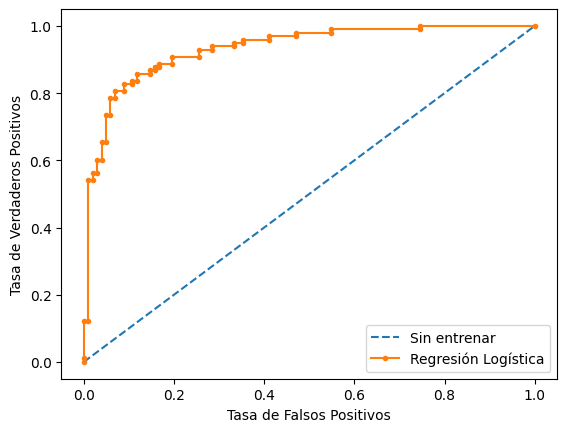

In [19]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

## Curba presicion sensibilidad

In [44]:
    # Importamos
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot


In [45]:
#Generamos dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
#Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
#Entrenamos
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)


LogisticRegression()

In [46]:
# predecimos probabilidades
lr_probs = model.predict_proba(testX)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 1]

In [47]:
# Sacamos los valores
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

Regresión Logística: f1=0.841 auc=0.898


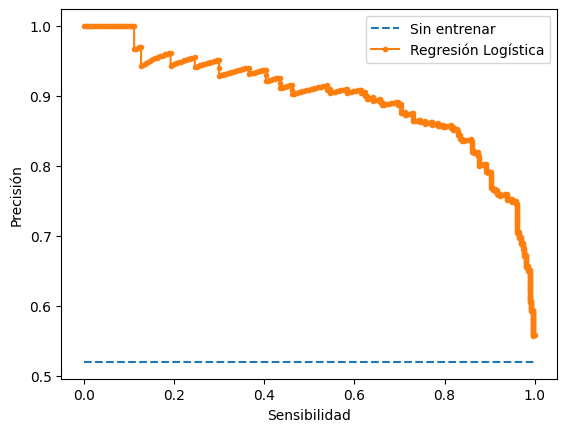

In [48]:
# Resumimos s
print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()